In [2]:
from keras.applications import
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.utils import to_categorical
from keras.preprocessing import image
import PIL.Image, PIL.ImageFont, PIL.ImageDraw


In [3]:
BATCH_SIZE = 32
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
(training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [5]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_images = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_images

In [6]:
train_X = preprocess_image_input(training_images)
valid_X = preprocess_image_input(validation_images)

In [7]:
def feature_extractor(inputs):

  return tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)

In [8]:
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

In [9]:
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    return classifier(resnet_feature_extractor)

In [10]:
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))

  classification_output = final_model(inputs)
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)

  model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

  return model


model = define_compile_model()

model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                              

In [11]:
EPOCHS = 3
history = model.fit(train_X, training_labels, epochs=EPOCHS, validation_data = (valid_X, validation_labels), batch_size=64)

Epoch 1/3
782/782 [==============================] - 296s 344ms/step - loss: 0.4073 - accuracy: 0.8655 - val_loss: 0.2264 - val_accuracy: 0.9213
Epoch 2/3
782/782 [==============================] - 266s 340ms/step - loss: 0.1069 - accuracy: 0.9647 - val_loss: 0.1544 - val_accuracy: 0.9474
Epoch 3/3
782/782 [==============================] - 266s 340ms/step - loss: 0.0363 - accuracy: 0.9899 - val_loss: 0.1626 - val_accuracy: 0.9483


In [12]:
loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=64)

157/157 [==============================] - 15s 93ms/step - loss: 0.1626 - accuracy: 0.9483


In [16]:
from matplotlib import pyplot as plt


def plot_metrics(metric_name, title, ylim=1.0):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

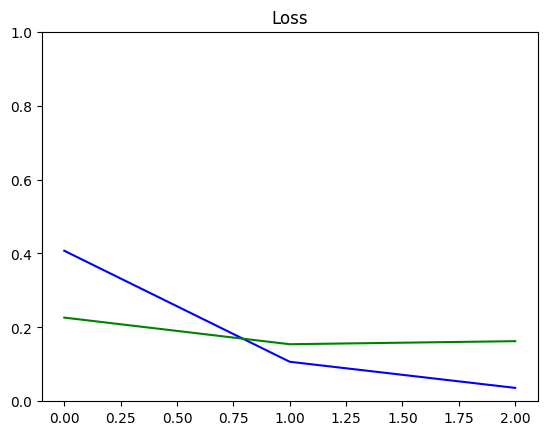

In [17]:
plot_metrics("loss", "Loss")

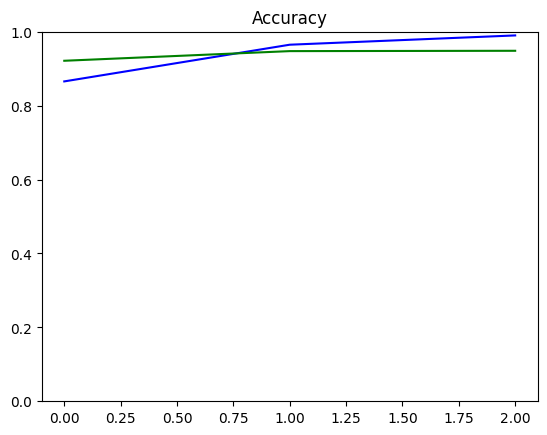

In [18]:
plot_metrics("accuracy", "Accuracy")